# Reinforcement Learning Project : Crazy Taxi AI

In [78]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from collections import deque
import random

In [79]:
def base_convert(i, b):
    result = []
    while len(result)<b:
            t=(i % b)
            result=[t]+result
            i = i // b
    return result
base_convert(2,4)

[0, 0, 0, 2]

In [80]:
voies = 3
rows = 4

def init_states (voies,rows):
    states=[]
    for i in range((voies+1)**(rows)):
        for j in range(voies):
            states+=[base_convert(i,voies+1) + [j]]
    return states

states=init_states(voies, rows)

def hash_s(s):
    name=""
    for j in s : 
        name=name+str(j)
    return name

def init_q(states) : 
    q={}
    for i in states :
        name = hash_s(i)
        if i[rows]==0 :
            actions_l = {"1":0, "2":0}
            q[name]=actions_l
        elif i[rows]==voies-1 :
            actions_r = {"1":0, "0":0}
            q[name]=actions_r
        else: 
            actions_c= {"0":0, "1":0,"2":0}
            q[name]=actions_c
    return q
            
q=init_q(states)


In [81]:
def add_car(t) : 
    j = random.random()
    p=t*j
    pos = voies
    if (j)>0.5:
        pos = random.randint(0,voies-1)
    return pos

def next_state(s,a,t=2):
    impossible3 = [[0,1,2],[2,1,0],[0,1,1],[2,1,1]]
    impossible5 = [[0,1,3,1,0],[2,1,3,1,2]]
    state = [add_car(t)]+s[0:(rows-1)]+[s[rows]+int(a)-1]
    while (state[0:3] in impossible3 or state in impossible5):
        state[0] = add_car(t)
    return state

next_state([1,3,1,3,0],1)
    

[3, 1, 3, 1, 0]

In [82]:
#Defining the environment 
#Convention 
g=-1
Actions = ["l", "r", "k"]
s0 = {"grid" : np.zeros((3,4)) , "position" : 0}

def act_with_softmax(s, q):
    prob_a = softmax(q[s, :])
    cumsum_a = np.cumsum(prob_a)
    return np.where(np.random.rand() < cumsum_a)[0][0]

def keywithmaxval(d):
    v = list(d.values())
    k = list(d.keys()) 
    return k[v.index(max(v))]

def reward(s,a):
    pos=s[-1]
    back= s[-2]
    front = s[-3]
    next_pos= pos+int(a)-1
    if (next_pos==front or next_pos==back):
        return -3
    return 1

def act_with_epsilon_greedy(s, q,epsilon=0.5):
    local_q = q[hash_s(s)]
    local_list = list(local_q.keys())
    if np.random.rand() < epsilon:
        a = np.random.randint(0,len(local_list))
        return local_list[a]
    a = keywithmaxval(local_q)
    return a



def find_maxQ(s, q):
    local_q = q[hash_s(s)]
    local_list = list(local_q.values())
    return max(local_list)
    
act_with_epsilon_greedy([0,3,1,0,2],q) 

        

'1'

In [85]:
import tkinter as tk
from PIL import Image, ImageTk  

image_car = Image.open("car.jpg")
image_car = image_car.resize((40,60))

image_taxi = Image.open("taxi.png") 
image_taxi = image_taxi.resize((40,60))

image_piece = Image.open("piece.jpeg")
image_piece = image_piece.resize((30,30))

def taxi_color(x,y,height,width):
    draw_car(x,y,height,width,color='red')
    
def car_color(x,y,height,width):
    draw_car(x,y,height,width,color='blue')
    
def draw_car_color(x,y,height,width,color,voies=3,rows=4):
    """ Dessine un cercle de centre (x,y) et de rayon r """
    r = 20
    coef_x, coef_y = height/(rows-1) , width/(1+voies)
    x = x*coef_x+2*r
    y = y*coef_y+2*r
    Canevas.create_oval(x-r, y-r, x+r, y+r, outline=color, fill=color)
    
def taxi(x,y,height,width):
    draw_car(x,y,height,width,photo = photo_taxi)
    
def car(x,y,height,width):
    draw_car(x,y,height,width,photo = photo_car)
    
def draw_car(x,y,height,width,photo,voies=3,rows=4):
    """ Dessine une photo de centre (x,y) """
    r = 20
    coef_x, coef_y = height/(rows-1) , width/(1+voies)
    x = x*coef_x+2*r
    y = y*coef_y+2*r
    Canevas.create_image(x-r, y-r, anchor = tk.NW, image=photo) 
    
def print_state(s,i,t):
    global Hauteur, Largeur
    Canevas.delete("all")
    s = [-5 if x == 3 else x for x in s]
    for j in range(len(s[:-1])):
        car(s[j],j,Hauteur,Largeur)
    taxi(s[-1],len(s)-2,Hauteur,Largeur)
    Canevas.create_text(100, Largeur - 20, text = "Episode : "+str(i))
    Canevas.create_text(100, Largeur - 10, text = "Temps : "+str(t))
    Canevas.update_idletasks()


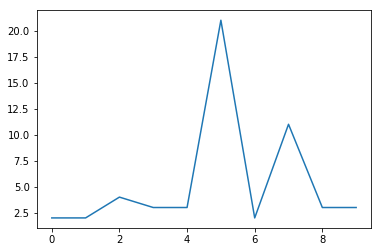

In [87]:
Mafenetre = tk.Tk()
Mafenetre.title('Crazy Taxi')

photo_taxi = ImageTk.PhotoImage(image_taxi, master = Mafenetre)
photo_car = ImageTk.PhotoImage(image_car, master = Mafenetre)

bg = Image.open("road.jpeg") 
background = ImageTk.PhotoImage(bg, master = Mafenetre)

Largeur = 450
Hauteur = 500
Canevas = tk.Canvas(Mafenetre, width = Largeur, height = Hauteur, bg ='white')
Canevas.create_image(0,0, image = background, anchor = tk.NW)
Canevas.pack(padx =5, pady =5)

def q_learning(num_episode = 10, gamma=0.9, alpha=0.1,voies=3, rows=4, epsilon = 0.3):
    states= init_states(voies,rows)
    q = init_q(states) 
    x=[]
    
    cumul = 0
    
    for i in range(num_episode):
        s = [random.randint(0,voies),random.randint(0,voies),3,3,random.randint(0,voies-1)]
        r=0
        t=0
        Display = False
        
        cumul += 1/(i+1) 
        if(cumul>1):
            cumul=0
            Display = True
        
        while (r!=-3):
            if(Display):
                Mafenetre.after(max(1,100-t), print_state(s,i,t))
            
            t+=1
            a = act_with_epsilon_greedy(s,q,epsilon*(10/(i+1)))
            r=reward(s,a)
            if (Display & r==-3):
                sleep(100)
            s_prime = next_state(s,a,t)
            delta = r + gamma*find_maxQ(s_prime,q) - q[hash_s(s)][a]
            q[hash_s(s)][a] += alpha * delta
            s=s_prime
            if(t>1000):
                break
        x += [t]
            
    return x

from matplotlib import pyplot as plt
Y = q_learning()
X = [i for i in range(len(Y))]
plt.plot(X,Y)
plt.show()   
    
Mafenetre.mainloop()

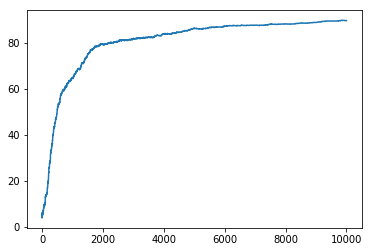

In [152]:
Y_prime = [np.mean(Y[0:i]) for i in range(1,len(Y))]
X = [i for i in range(len(Y_prime))]
plt.plot(X,Y_prime)
plt.show()   

Episode : 1
[([0, 3, 3, 1, 0], '1'), ([3, 0, 3, 3, 0], '2'), ([3, 3, 0, 3, 1], '0')]
Episode : 1
[([0, 3, 3, 1, 0], '1'), ([3, 0, 3, 3, 0], '2'), ([3, 3, 0, 3, 1], '0')]
Episode : 1
[([0, 3, 3, 1, 0], '1'), ([3, 0, 3, 3, 0], '2'), ([3, 3, 0, 3, 1], '0')]
Episode : 6
[([3, 1, 3, 3, 2], '1'), ([2, 3, 1, 3, 2], '0')]
Episode : 6
[([3, 1, 3, 3, 2], '1'), ([2, 3, 1, 3, 2], '0')]
Episode : 19
[([2, 1, 3, 3, 0], '1'), ([3, 2, 1, 3, 0], '2')]
Episode : 19
[([2, 1, 3, 3, 0], '1'), ([3, 2, 1, 3, 0], '2')]
Episode : 55
[([3, 1, 1, 3, 2], '1'), ([3, 3, 1, 1, 2], '1'), ([3, 3, 3, 1, 2], '0')]
Episode : 55
[([3, 1, 1, 3, 2], '1'), ([3, 3, 1, 1, 2], '1'), ([3, 3, 3, 1, 2], '0')]
Episode : 55
[([3, 1, 1, 3, 2], '1'), ([3, 3, 1, 1, 2], '1'), ([3, 3, 3, 1, 2], '0')]
Episode : 153
[([1, 2, 3, 3, 0], '2'), ([3, 1, 2, 3, 1], '2')]
Episode : 153
[([1, 2, 3, 3, 0], '2'), ([3, 1, 2, 3, 1], '2')]
Episode : 419
[([2, 0, 2, 0, 2], '0'), ([0, 2, 0, 2, 1], '1'), ([2, 0, 2, 0, 1], '2')]
Episode : 419
[([2, 0, 2, 0,

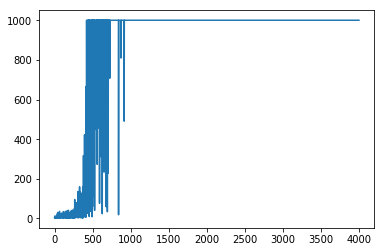

In [8]:
Mafenetre = tk.Tk()
Mafenetre.title('Crazy Taxi')
Largeur = 450
Hauteur = 500
Canevas = tk.Canvas(Mafenetre, width = Largeur, height = Hauteur, bg ='white')
Canevas.pack(padx =5, pady =5)

def q_learning_backprop(num_episode = 4000, gamma=0.9, alpha=0.1,voies=3, rows=4, epsilon = 0.3,register_size=3):
    states= init_states(voies,rows)
    q = init_q(states) 
    x=[]
    
    cumul = 0
    
    for i in range(num_episode):
        s = [random.randint(0,voies),random.randint(0,voies),3,3,random.randint(0,voies-1)]
        r=0
        t=0
        Display = False
        history = []
        
        cumul += 1/(i+1) 
        if(cumul>1):
            cumul=0
            Display = True
        
        while (r!=-3):
            if(i==2000):
                Mafenetre.after(500, print_state(s,i,t))
                #Mafenetre.after(max(1,10-t), print_state(s,i,t))
            t+=1
            a = act_with_epsilon_greedy(s,q,epsilon*np.exp(-i/100))
            r=reward(s,a)
            if len(history)<register_size :
                history.append((s,a))
            else :
                history=history[1:5]+[(s,a)]
                
            s_prime = next_state(s,a,t)
            delta = r + gamma*find_maxQ(s_prime,q) - q[hash_s(s)][a]
            q[hash_s(s)][a] += alpha * delta
            s=s_prime 
            
            if r==-3 : 
                for j in range(len(history)) : 
                    q[hash_s(history[j][0])][history[j][1]] += r * np.exp((j-register_size-1)/5)
                    
                    if(Display):
                        print("Episode : " +  str(i))
                        print(history)
                        #Mafenetre.after(1000, print_state(history[j][0],"Mort : "+str(i),t+j))
            if(t>1000):
                break
        x += [t]
            
    return x

from matplotlib import pyplot as plt
Y = q_learning_backprop()
X = [i for i in range(len(Y))]
plt.plot(X,Y)
plt.show()   
    
Mafenetre.mainloop()

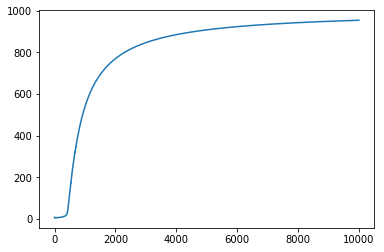

In [146]:
Y_prime = [np.mean(Y[0:i]) for i in range(1,len(Y))]
X = [i for i in range(len(Y_prime))]
plt.plot(X,Y_prime)
plt.show()  

In [147]:
np.mean(Y[-1000:-1])

1001.0